In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Texas real estate analysis:
### I found some real estate data on Zillow for the San Antonio and Austin areas. 

## Questions I want to answer:

### 1) Is it really better to sell in the summer?
### 2) How long does it take for homes to sell in the San Antonio/Austin area?
### 3) Are prices increasing overall? By how much?
### 4) What are the average property values?

In [2]:
# Importing my data
days = pd.read_csv("DaysOnZillow_City.csv")
counts = pd.read_csv("Sale_Counts_Zip.csv")
prices = pd.read_csv("Sale_Prices_Zip.csv")

### How long does it take for homes to sell in Texas near Major cities?

In [5]:
# Isolating just the texas data
texas_days = days.loc[days['StateName'] == "TX"]
texas_days.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
3,4,39051,Houston,City,TX,141.0,142.0,143.0,120.0,95.0,...,66.0,65.0,69.0,73.0,70.0,78.0,82.0,91.0,91.0,94.0
4,5,6915,San Antonio,City,TX,100.0,103.0,116.5,115.0,109.0,...,58.0,56.0,56.0,56.0,58.0,61.0,67.0,76.0,72.0,78.0
9,10,38128,Dallas,City,TX,136.0,159.0,128.0,119.0,112.0,...,55.0,56.0,60.0,64.0,68.0,69.0,70.0,69.0,76.0,79.0
11,12,10221,Austin,City,TX,105.0,123.0,109.0,81.0,83.0,...,49.0,47.0,50.0,54.0,57.0,57.0,65.0,69.0,67.0,79.0
16,17,18172,Fort Worth,City,TX,116.5,115.0,111.0,102.5,100.0,...,47.0,49.0,48.0,48.0,51.0,54.0,61.0,60.0,71.5,73.5


In [6]:
# Oh man....why are there so many columns?

# I'm going to have to clean this data up
texas_days.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,...,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01
3,4,39051,Houston,City,TX,141.0,142.0,143.0,120.0,95.0,...,66.0,65.0,69.0,73.0,70.0,78.0,82.0,91.0,91.0,94.0
4,5,6915,San Antonio,City,TX,100.0,103.0,116.5,115.0,109.0,...,58.0,56.0,56.0,56.0,58.0,61.0,67.0,76.0,72.0,78.0
9,10,38128,Dallas,City,TX,136.0,159.0,128.0,119.0,112.0,...,55.0,56.0,60.0,64.0,68.0,69.0,70.0,69.0,76.0,79.0
11,12,10221,Austin,City,TX,105.0,123.0,109.0,81.0,83.0,...,49.0,47.0,50.0,54.0,57.0,57.0,65.0,69.0,67.0,79.0
16,17,18172,Fort Worth,City,TX,116.5,115.0,111.0,102.5,100.0,...,47.0,49.0,48.0,48.0,51.0,54.0,61.0,60.0,71.5,73.5


In [7]:
# converting the column names past the first 5 to a list
cols = texas_days.columns[5:].tolist()

In [8]:
# using melt, condensing all of the data into three columns
cond_TX = pd.melt(texas_days, id_vars=['RegionName'], value_vars=cols)

In [9]:
# Hmmmmm....better. But I need to split the "variable" column into year and month or maybe just parse it into a date.
cond_TX.head()

,RegionName,variable,value
0,Houston,2010-01,141.0
1,San Antonio,2010-01,100.0
2,Dallas,2010-01,136.0
3,Austin,2010-01,105.0
4,Fort Worth,2010-01,116.5


In [10]:
# Parsing the date
cond_TX['variable'] = pd.to_datetime(cond_TX['variable'], format='%Y-%m')

In [11]:
cond_TX.dtypes

RegionName            object
variable      datetime64[ns]
value                float64
dtype: object

In [12]:
# renaming the variable column
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
tx = cond_TX.rename(columns={"variable": "Year_month", "value": 'Days'})

In [13]:
# How man unique cities do I have here?

len(tx)
unique = tx.groupby('RegionName').nunique()
print(unique.count())

RegionName    117
Year_month    117
Days          117
dtype: int64


In [14]:
# this is a lot of data and I'm only interested in essentially the I-35 cooridor

array = ['Austin', 'Round Rock', 'Kyle', "Buda", "San Marcos", "New Braunfels", "Universal City", "Cibolo", "Shertz", 
        "Live Oak", "Selma", "San Antonio", "Cedar Park", "Bee Cave", "Pflugerville", "Boerne"]
tx = tx.loc[tx['RegionName'].isin(array)]

In [15]:
# All of the cities in the original data along the I=35 cooridor
tx.groupby('RegionName').nunique()

,RegionName,Year_month,Days
RegionName,,,
Austin,1,109,59
Boerne,1,109,10
Cedar Park,1,109,69
Cibolo,1,109,31
Kyle,1,109,67
New Braunfels,1,109,29
Round Rock,1,109,39
San Antonio,1,109,61
Universal City,1,109,11


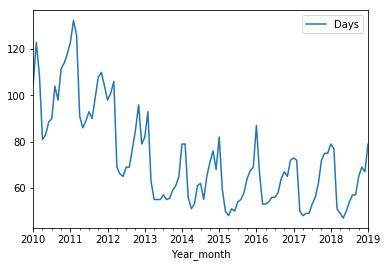

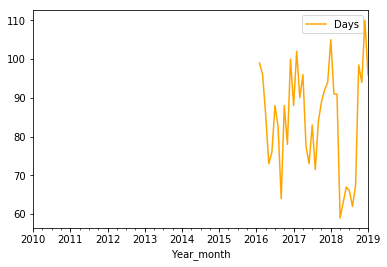

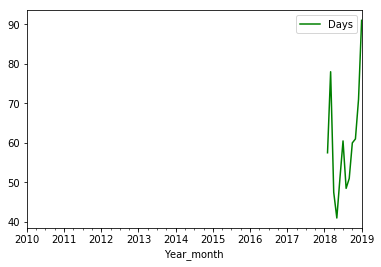

In [16]:
# I'm going to filter out each individual city and then plot the average number of days on the market per city.
tx = tx.sort_values('Year_month', ascending=True)

austin = tx.loc[tx['RegionName'] == "Austin"]
boerne = tx.loc[tx['RegionName'] == "Boerne"]
cp = tx.loc[tx['RegionName'] == "Cedar Park"]
cibolo = tx.loc[tx['RegionName'] == "Cibolo"]
kyle = tx.loc[tx['RegionName'] == "Kyle"]
nb = tx.loc[tx['RegionName'] == "New Braunfels"]
rr = tx.loc[tx['RegionName'] == "Round Rock"]
sa = tx.loc[tx['RegionName'] == "San Antonio"]
uc = tx.loc[tx['RegionName'] == "Universal City"]


austin.plot('Year_month', 'Days')
nb.plot('Year_month', 'Days', color='orange')
uc.plot('Year_month', 'Days', color='green')

Text(0.5, 1.0, 'Avg Days on the Market')

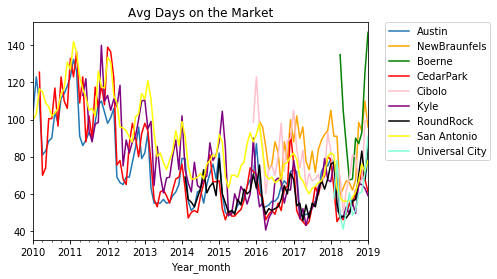

In [17]:
# Doing individual graphs isn't the best way to do this. I want them on one graph.


ax = austin.plot('Year_month', 'Days', label='Austin')
nb.plot('Year_month', 'Days', color='orange', ax=ax, label='NewBraunfels')
boerne.plot('Year_month', 'Days', color='green', ax=ax, label='Boerne')
cp.plot('Year_month', 'Days', color='red', ax=ax, label='CedarPark')
cibolo.plot('Year_month', 'Days', color='pink', ax=ax, label='Cibolo')
kyle.plot('Year_month', 'Days', color='purple', ax=ax, label='Kyle')
rr.plot('Year_month', 'Days', color='black', ax=ax, label='RoundRock')
sa.plot('Year_month', 'Days', color='yellow', ax=ax, label='San Antonio')
uc.plot('Year_month', 'Days', color='aquamarine', ax=ax, label='Universal City')

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(label="Avg Days on the Market", loc='center')

### Hmmm looks like the least number of days typically occurs around March to July timeframe. Then it starts to go back up again. Makes sense to me because March/April this far south is very nice. May-July is probably due to lack of school so families are more likely to move.

### Also, it looks like the number average number of days on the market has been dropping since 2012-ish.

### So it looks like you should list your house just before March, but selling in the summer is still quicker than the winter. December and January are not good months for selling.

In [18]:
# Ok, so how long does is take on average to sell a home overall, and per city?
all_avg = tx['Days'].mean()
print(f"Average number of days overall in I-35 cooridor: {all_avg:.2f}")

Average number of days overall in I-35 cooridor: 76.25


In [19]:
tx.head()

,RegionName,Year_month,Days
1,San Antonio,2010-01-01,100.0
3,Austin,2010-01-01,105.0
21,Round Rock,2010-01-01,NaN
40,New Braunfels,2010-01-01,NaN
55,Cedar Park,2010-01-01,NaN


In [20]:
# Averages per city
austin_avg = austin["Days"].mean()
print(f"Average number of days properties stay on the market in Austin: {austin_avg:.2f}")

nb_avg = nb["Days"].mean()
print(f"Average number of days properties stay on the market in New Braunfels: {nb_avg:.2f}")

boerne_avg = boerne["Days"].mean()
print(f"Average number of days properties stay on the market in Boerne: {boerne_avg:.2f}")

cp_avg = cp["Days"].mean()
print(f"Average number of days properties stay on the market in Cedar Park: {cp_avg:.2f}")

cibolo_avg = cibolo["Days"].mean()
print(f"Average number of days properties stay on the market in Cibolo: {cibolo_avg:.2f}")

kyle_avg = kyle["Days"].mean()
print(f"Average number of days properties stay on the market in Kyle: {kyle_avg:.2f}")

rr_avg = rr["Days"].mean()
print(f"Average number of days properties stay on the market in Round Rock: {rr_avg:.2f}")

sa_avg = sa["Days"].mean()
print(f"Average number of days properties stay on the market in San Antonio: {sa_avg:.2f}")

uc_avg = uc["Days"].mean()
print(f"Average number of days properties stay on the market in Universal City: {uc_avg:.2f}")

Average number of days properties stay on the market in Austin: 73.23
Average number of days properties stay on the market in New Braunfels: 84.44
Average number of days properties stay on the market in Boerne: 100.35
Average number of days properties stay on the market in Cedar Park: 74.14
Average number of days properties stay on the market in Cibolo: 78.88
Average number of days properties stay on the market in Kyle: 74.29
Average number of days properties stay on the market in Round Rock: 60.00
Average number of days properties stay on the market in San Antonio: 87.94
Average number of days properties stay on the market in Universal City: 59.83


### Looks like it takes less time to sell a house in Universal City. And much longer to sell in Boerne. 

In [21]:
# I'm going to try and predict the number of days that it will take for a house to sell in the future months.
# Never used this before

from fbprophet import Prophet



In [22]:
# So it takes a date column and then one other numerical column
future = pd.DataFrame({
     'ds': tx['Year_month'],
     'y': tx['Days']
})

future.head()

,ds,y
1,2010-01-01,100.0
3,2010-01-01,105.0
21,2010-01-01,NaN
40,2010-01-01,NaN
55,2010-01-01,NaN


In [23]:
# We fit the model by instantiating a new Prophet object. Any settings to the forecasting procedure are passed into 
# the constructor. 

# Then you call its fit method and pass in the historical dataframe. 

# Note: ds and y have to be lower case

m = Prophet()
m.fit(future)

/anaconda3/envs/dev/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/envs/dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [24]:
# You can get a suitable dataframe that extends into the future a specified number of days using the helper method 
# Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model 
# fit as well.

prediction = m.make_future_dataframe(periods=365)
prediction.tail()

,ds
1341,2019-12-28
1342,2019-12-29
1343,2019-12-30
1344,2019-12-31
1345,2020-01-01


In [25]:
# I think I would like to go out further than a year though. Lets see what happens

prediction = m.make_future_dataframe(periods=365*2)
prediction.tail()


,ds
1706,2020-12-27
1707,2020-12-28
1708,2020-12-29
1709,2020-12-30
1710,2020-12-31


In [26]:
# The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical 
# dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat 
# with the forecast, as well as columns for components and uncertainty intervals.

forecast = m.predict(prediction)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
1706,2020-12-27,98.738567,80.865179,116.777848
1707,2020-12-28,95.575364,78.629613,112.724640
1708,2020-12-29,92.435199,74.493111,110.346341
1709,2020-12-30,89.387209,70.662350,108.046492
1710,2020-12-31,86.498771,68.796011,104.642583


In [27]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1706,2020-12-27,70.060813,80.865179,116.777848,66.922720,73.289770,28.677754,28.677754,28.677754,28.677754,28.677754,28.677754,0.0,0.0,0.0,98.738567
1707,2020-12-28,70.062123,78.629613,112.724640,66.920754,73.295803,25.513241,25.513241,25.513241,25.513241,25.513241,25.513241,0.0,0.0,0.0,95.575364
1708,2020-12-29,70.063432,74.493111,110.346341,66.918788,73.304033,22.371767,22.371767,22.371767,22.371767,22.371767,22.371767,0.0,0.0,0.0,92.435199
1709,2020-12-30,70.064742,70.662350,108.046492,66.916822,73.312263,19.322468,19.322468,19.322468,19.322468,19.322468,19.322468,0.0,0.0,0.0,89.387209
1710,2020-12-31,70.066051,68.796011,104.642583,66.912833,73.320493,16.432719,16.432719,16.432719,16.432719,16.432719,16.432719,0.0,0.0,0.0,86.498771


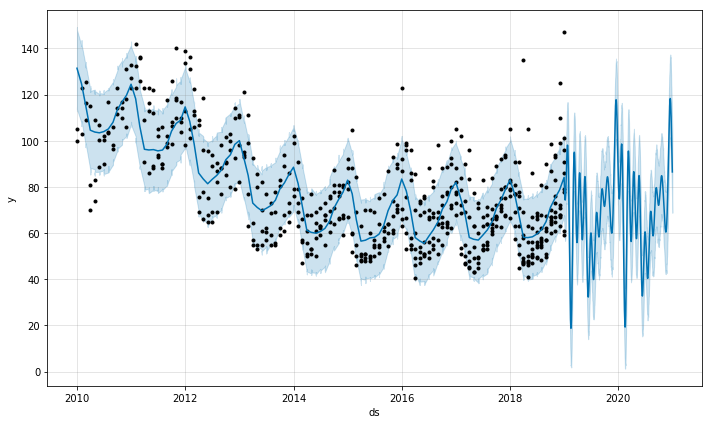

In [28]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

fig1 = m.plot(forecast)

### Ok this is cool. The trend seems to stay the same. Lowest number of days on the market is around March. The greatest is around the end of the year. 

### It does look like the over all trend of declining days on the market levels out and maybe increases slightly.

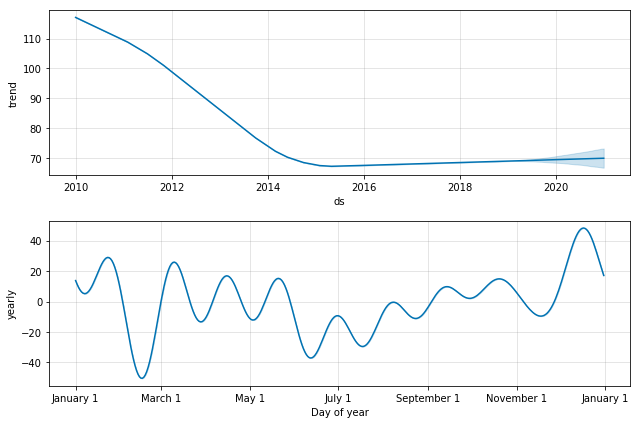

In [29]:
fig2 = m.plot_components(forecast)

## But what if I want to buy a place? How are the prices? Increasing or Decreasing?

In [30]:
# Here is my spreadsheet of median prices in US dollars for the region (adjusted for seasonal change)
# I"m going to rename one of my columns to zip code
prices = prices.rename(index=str, columns={"RegionName": "Zip Code"})
prices.head()

,RegionID,Zip Code,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,61639.0,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,...,1036800.0,1008500.0,941300.0,997600.0,1090100.0,1140000.0,1051700.0,943200.0,902300.0,928800.0
1,84654.0,60657,Illinois,2,NaN,NaN,NaN,NaN,NaN,NaN,...,333100.0,335600.0,380400.0,419400.0,404300.0,411000.0,401500.0,429700.0,440500.0,NaN
2,91982.0,77494,Texas,3,NaN,NaN,NaN,NaN,NaN,NaN,...,345200.0,345200.0,331900.0,329100.0,315800.0,310300.0,309100.0,323800.0,NaN,NaN
3,93144.0,79936,Texas,4,NaN,NaN,NaN,NaN,NaN,NaN,...,127200.0,131200.0,131900.0,130800.0,129000.0,129500.0,127700.0,127900.0,128100.0,NaN
4,91940.0,77449,Texas,5,NaN,NaN,NaN,NaN,NaN,NaN,...,176900.0,177700.0,177400.0,179200.0,183200.0,186500.0,190100.0,190500.0,188600.0,186600.0


In [31]:
# So instead of city names, I have zip codes. I found a list of zipcodes at https://www.zipcodestogo.com/Texas/

# Lets import it

zips = pd.read_csv('zips.csv', header = 1)
zips.head()

# Clean it up by removing unnecessary columns
zips = zips[["Zip Code", "City", "County"]]
zips.head()

,Zip Code,City,County
0,73301,Austin,Travis
1,73344,Austin,Travis
2,75001,Addison,Dallas
3,75002,Allen,Collin
4,75006,Carrollton,Dallas


In [32]:
# Using my array from earlier, only want the cities I care about
codes = zips.loc[zips['City'].isin(array)]
codes.head()

,Zip Code,City,County
0,73301,Austin,Travis
1,73344,Austin,Travis
1594,78006,Boerne,Kendall
1603,78015,Boerne,Kendall
1653,78108,Cibolo,Guadalupe


In [33]:
# Merging both of the csv's to get the city name and zip code in one csv
    
final_zip = pd.merge(codes, prices, on='Zip Code')

final_zip.head()

,Zip Code,City,County,RegionID,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,...,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02
0,78015,Boerne,Kendall,92205.0,Texas,4761,NaN,NaN,NaN,NaN,...,412400.0,385900.0,384200.0,395800.0,403000.0,375400.0,354100.0,354500.0,399500.0,410300.0
1,78108,Cibolo,Guadalupe,92255.0,Texas,1891,157700.0,169900.0,168900.0,179400.0,...,249600.0,247000.0,239600.0,237600.0,244100.0,261500.0,270700.0,273900.0,266000.0,NaN
2,78130,New Braunfels,Comal,92271.0,Texas,16,NaN,NaN,NaN,NaN,...,227400.0,226100.0,228800.0,222000.0,217200.0,226100.0,227200.0,228900.0,225400.0,NaN
3,78148,Universal City,Bexar,92284.0,Texas,3682,NaN,NaN,NaN,NaN,...,174500.0,178900.0,191000.0,200500.0,204100.0,185000.0,182900.0,187500.0,183000.0,NaN
4,78216,San Antonio,Bexar,92312.0,Texas,645,NaN,NaN,NaN,NaN,...,245200.0,243900.0,219800.0,221700.0,203600.0,207200.0,204900.0,237800.0,224700.0,NaN


In [34]:
# I have the same problem as before where I have a bajillion columns that should probably be in rows. Going to switch
# them.

# converting the column names past the first 5 to a list
cols2 = final_zip.columns[6:].tolist()

# using melt, condensing all of the data into three columns
prices_med = pd.melt(final_zip, id_vars=['Zip Code', 'City'], value_vars=cols2)


In [35]:
prices_med.head()

,Zip Code,City,variable,value
0,78015,Boerne,2008-03,NaN
1,78108,Cibolo,2008-03,157700.0
2,78130,New Braunfels,2008-03,NaN
3,78148,Universal City,2008-03,NaN
4,78216,San Antonio,2008-03,NaN


In [36]:
tx_med = prices_med.rename(columns={"variable": "Year_month", "value": 'Median Price'})
tx_med.head()

,Zip Code,City,Year_month,Median Price
0,78015,Boerne,2008-03,NaN
1,78108,Cibolo,2008-03,157700.0
2,78130,New Braunfels,2008-03,NaN
3,78148,Universal City,2008-03,NaN
4,78216,San Antonio,2008-03,NaN


In [37]:
# What are the unique values I have for each city
tx_med.groupby('City').nunique()

,Zip Code,City,Year_month,Median Price
City,,,,
Austin,10,1,132,452
Boerne,1,1,132,68
Buda,1,1,132,55
Cedar Park,1,1,132,41
Cibolo,1,1,132,127
Kyle,1,1,132,56
New Braunfels,1,1,132,39
Round Rock,2,1,132,110
San Antonio,20,1,132,897


In [38]:
# Hmmmm...Some of these have more than one zip code so I'm going to do separate graphs for them

In [39]:
# Did the median price increase over time? Lets plot and see

# Sorting the data by Year and month
tx_med = tx_med.sort_values('Year_month', ascending=True)


# Using loc, isolating the cities that we are interested in.
austin = tx_med.loc[tx_med['City'] == "Austin"]
boerne = tx_med.loc[tx_med['City'] == "Boerne"]
cp = tx_med.loc[tx_med['City'] == "Cedar Park"]
cibolo = tx_med.loc[tx_med['City'] == "Cibolo"]
kyle = tx_med.loc[tx_med['City'] == "Kyle"]
nb = tx_med.loc[tx_med['City'] == "New Braunfels"]
rr = tx_med.loc[tx_med['City'] == "Round Rock"]
sa = tx_med.loc[tx_med['City'] == "San Antonio"]
uc = tx_med.loc[tx_med['City'] == "Universal City"]

Text(0.5, 1.0, 'Median Home Price along I-35')

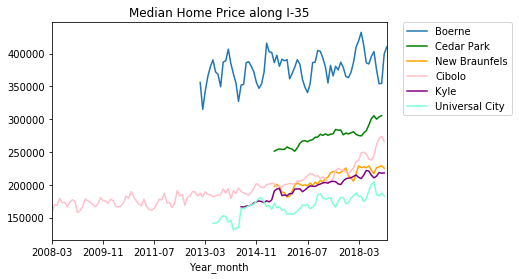

In [40]:
# I'm only interested in the cities that have one zip code for now.
ax1 = boerne.plot('Year_month', 'Median Price', label='Boerne')
cp.plot('Year_month', 'Median Price', ax=ax1, color='green', label="Cedar Park")
nb.plot('Year_month', 'Median Price', color='orange', ax=ax1, label='New Braunfels')
cibolo.plot('Year_month', 'Median Price', color='pink', ax=ax1, label='Cibolo')
kyle.plot('Year_month', 'Median Price', color='purple', ax=ax1, label='Kyle')
uc.plot('Year_month', 'Median Price', color='aquamarine', ax=ax1, label='Universal City')

ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(label="Median Home Price along I-35", loc='center')

In [41]:
# Omg. Don't live in Boerne unless you rich.

In [53]:
# Getting unique Zip codes in Austin and creating a list to make it easier to graph

testzip = austin['Zip Code'].unique()
testzip.tolist()

[78717, 78723, 78729, 78737, 78745, 78748, 78750, 78754, 78759, 78728]

In [43]:
austin.head()

,Zip Code,City,Year_month,Median Price
29,78717,Austin,2008-03,NaN
30,78723,Austin,2008-03,NaN
32,78729,Austin,2008-03,NaN
33,78737,Austin,2008-03,NaN
34,78745,Austin,2008-03,NaN


Text(0.5, 1.0, 'Median Home Price in Austin')

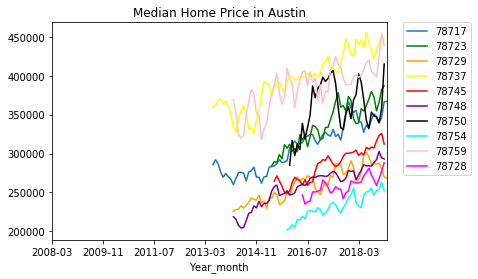

In [44]:
# Looking at each individual zip code in austin and then graphing. Is there a better way to do this?
austinzip1 = austin.loc[austin['Zip Code'] == testzip[0]]
austinzip2 = austin.loc[austin['Zip Code'] == testzip[1]]
austinzip3 = austin.loc[austin['Zip Code'] == testzip[2]]
austinzip4 = austin.loc[austin['Zip Code'] == testzip[3]]
austinzip5 = austin.loc[austin['Zip Code'] == testzip[4]]
austinzip6 = austin.loc[austin['Zip Code'] == testzip[5]]
austinzip7 = austin.loc[austin['Zip Code'] == testzip[6]]
austinzip8 = austin.loc[austin['Zip Code'] == testzip[7]]
austinzip9 = austin.loc[austin['Zip Code'] == testzip[8]]
austinzip10 = austin.loc[austin['Zip Code'] == testzip[9]]

ax2 = austinzip1.plot('Year_month', 'Median Price', label=testzip[0])
austinzip2.plot('Year_month', 'Median Price', ax=ax2, color='green', label=testzip[1])
austinzip3.plot('Year_month', 'Median Price', ax=ax2, color='orange', label=testzip[2])
austinzip4.plot('Year_month', 'Median Price', ax=ax2, color='yellow', label=testzip[3])
austinzip5.plot('Year_month', 'Median Price', ax=ax2, color='red', label=testzip[4])
austinzip6.plot('Year_month', 'Median Price', ax=ax2, color='purple', label=testzip[5])
austinzip7.plot('Year_month', 'Median Price', ax=ax2, color='black', label=testzip[6])
austinzip8.plot('Year_month', 'Median Price', ax=ax2, color='aqua', label=testzip[7])
austinzip9.plot('Year_month', 'Median Price', ax=ax2, color='pink', label=testzip[8])
austinzip10.plot('Year_month', 'Median Price', ax=ax2, color='magenta', label=testzip[9])

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title(label="Median Home Price in Austin", loc='center')


In [60]:
# Looks like Austin's median home prices are going up too. Now lets look at San Antonio

# Getting a list of unique San Antonio zip codes

saziplist = sa['Zip Code'].unique()
saziplist.tolist()
print(len(saziplist))

20


In [55]:
sazip1 = sa.loc[sa['Zip Code'] == saziplist[0]]
sazip2 = sa.loc[sa['Zip Code'] == saziplist[1]]
sazip3 = sa.loc[sa['Zip Code'] == saziplist[2]]